# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# SVM Lineal

$$\frac{1}{n}\sum_{i=1}^n \max(0,1-y_i(Ax_i-b))+\alpha||A||^2$$

- $A$: es el vector de las pendientes en cada variable 
- $b$: es la ordenada en el origen (intercept)
- $x=(x_1,x_2,\cdots, x_n)$ es el vector de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regularización y suavizado de la separación

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [9]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [10]:
batch_size = 100

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [11]:
model_output = tf.subtract(tf.matmul(x_data,A), b)

In [12]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [13]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [14]:
my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
loss_vect = []
train_acc = []
test_acc = []

for i in range(600):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict= {x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+", b = "+str(session.run(b))+ ", Loss = "+str(temp_loss))

Paso #100, A = [[ 0.3101883]
 [-1.2685145]], b = [[1.089386]], Loss = [0.4703654]
Paso #200, A = [[ 0.30436578]
 [-1.279839  ]], b = [[1.0224864]], Loss = [0.5326474]
Paso #300, A = [[ 0.2854184]
 [-1.2809023]], b = [[0.96108645]], Loss = [0.47879457]
Paso #400, A = [[ 0.28089747]
 [-1.2840688 ]], b = [[0.8960862]], Loss = [0.4340588]
Paso #500, A = [[ 0.2745479]
 [-1.286991 ]], b = [[0.83168644]], Loss = [0.49588662]
Paso #600, A = [[ 0.26135924]
 [-1.2978547 ]], b = [[0.7693864]], Loss = [0.48076177]


In [16]:
[[a1],[a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2/a1
y_intercept = b/a1


x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==-1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==-1] 

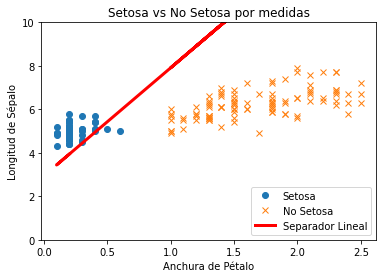

In [17]:
plt.plot(setosa_x, setosa_y, 'o', label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, 'x', label="No Setosa")
plt.plot(x1_vals, best_fit, 'r-', label = "Separador Lineal", linewidth=3)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.show()

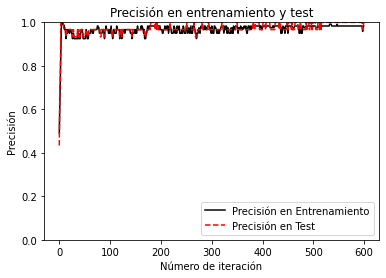

In [18]:
plt.plot(train_acc, 'k-', label = "Precisión en Entrenamiento")
plt.plot(test_acc, 'r--', label = "Precisión en Test")
plt.title("Precisión en entrenamiento y test")
plt.xlabel("Número de iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.ylim([0,1])
plt.show()

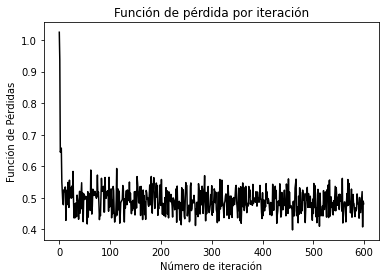

In [19]:
plt.plot(loss_vect, 'k-')
plt.title("Función de pérdida por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas")
plt.show()